In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

data = pd.read_excel("../data/Revenue_Budget.xlsx")


In [2]:
data.head()

,Service #,Service Name,Fund #,Fund,Fund- # & Name,Dept #,Dept Name,SubDept#,SubDept Name,Service Area,Type,Acct #,Acct Name,Acct Cat,AU All,budgetType,Amount,Year,PerCapita
0,100001,General Fund Level,100,General,100-General,100,Fund Level,1,General Fund Level,General Fund Level,Revenue,41101,Ad Valorem-Current Year,Property Tax,100001-41101,adopted,-320700000,2013,-639.083960
1,100001,General Fund Level,100,General,100-General,100,Fund Level,1,General Fund Level,General Fund Level,Revenue,41102,Ad Valorem-Prior Years,Property Tax,100001-41102,adopted,-2400000,2013,-4.782668
2,100001,General Fund Level,100,General,100-General,100,Fund Level,1,General Fund Level,General Fund Level,Revenue,41103,Vehicle Taxes-Current Year,Property Tax,100001-41103,adopted,-23000000,2013,-45.833898
3,100001,General Fund Level,100,General,100-General,100,Fund Level,1,General Fund Level,General Fund Level,Revenue,41104,Vehicle Taxes-Prior Years,Property Tax,100001-41104,adopted,-1900000,2013,-3.786279
4,100001,General Fund Level,100,General,100-General,100,Fund Level,1,General Fund Level,General Fund Level,Revenue,41113,Vehicle Taxes - Current Year (VTS),Property Tax,100001-41113,adopted,0,2013,0.000000


In [4]:
data.columns

Index(['Service #', 'Service Name', 'Fund #', 'Fund', 'Fund- # & Name',
       'Dept #', 'Dept Name', 'SubDept#', 'SubDept Name', 'Service Area',
       'Type', 'Acct #', 'Acct Name', 'Acct Cat', 'AU All', 'budgetType',
       'Amount', 'Year', 'PerCapita'],
      dtype='object')

In [46]:
#data.describe()
data.corr()

,Service #,Fund #,Dept #,SubDept#,Acct #,Amount,Year,PerCapita
Service #,1.000000,-0.122764,0.999999,0.264781,0.233076,-0.075673,0.003075,0.075681
Fund #,-0.122764,1.000000,-0.122623,-0.105131,0.039984,0.009009,0.023505,-0.009004
Dept #,0.999999,-0.122623,1.000000,0.263305,0.233102,-0.075568,0.003161,0.075575
SubDept#,0.264781,-0.105131,0.263305,1.000000,0.069016,-0.070347,-0.008938,0.070337
Acct #,0.233076,0.039984,0.233102,0.069016,1.000000,-0.127861,0.004435,0.127838
Amount,-0.075673,0.009009,-0.075568,-0.070347,-0.127861,1.000000,0.008835,-0.999878
Year,0.003075,0.023505,0.003161,-0.008938,0.004435,0.008835,1.000000,-0.007642
PerCapita,0.075681,-0.009004,0.075575,0.070337,0.127838,-0.999878,-0.007642,1.000000


In [6]:
data.Amount.describe()

count    3.646000e+03
mean    -1.032810e+06
std      1.338773e+07
min     -3.321408e+08
25%     -1.357885e+05
50%     -1.786200e+04
75%     -5.647500e+02
max      0.000000e+00
Name: Amount, dtype: float64

In [51]:
thirteen = data[data.Year == 2013]
fourteen = data[data.Year == 2014]
fifteen = data[data.Year == 2015]
sixteen = data[data.Year == 2016]
seventeen = data[data.Year == 2017]
eighteen = data[data.Year == 2018]


thirteen_sum = thirteen.Amount.sum() * -1
fourteen_sum = fourteen.Amount.sum() * -1
fifteen_sum = fifteen.Amount.sum() * -1
sixteen_sum = sixteen.Amount.sum() * -1
seventeen_sum = seventeen.Amount.sum() * -1
eighteen_sum = eighteen.Amount.sum() * -1

thirteen_mean = thirteen.Amount.mean() * -1
fourteen_mean = fourteen.Amount.mean() * -1
fifteen_mean = fifteen.Amount.mean() * -1
sixteen_mean = sixteen.Amount.mean() * -1
seventeen_mean = seventeen.Amount.mean() * -1
eighteen_mean = eighteen.Amount.mean() * -1

counts = [thirteen.count(), fourteen.count(), fifteen.count(), sixteen.count(), seventeen.count(), eighteen.count()]
sums = [thirteen_sum, fourteen_sum, fifteen_sum, sixteen_sum, seventeen_sum, eighteen_sum]
means = [thirteen_mean, fourteen_mean, fifteen_mean, sixteen_mean, seventeen_mean, eighteen_mean]
axes = [2013, 2014, 2015, 2016, 2017, 2018]


C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


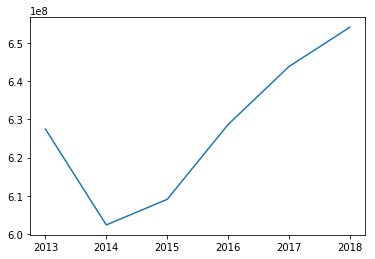

In [43]:
plt.plot(axes, sums)
#plt.show(pd.DataFrame(d=(axes,sums).plot(kind="bar"))
#data.Amount=data.Amount* -1
#plt.show(data.groupby("Year").Amount.sum().plot(kind="bar"))

In [14]:
sums

[627493567, 602366971, 609064920, 628665865, 643857089, 654175999]

The sums of all yearly budgets are on the order of $600 million to $650 million

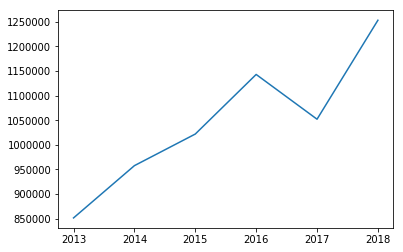

In [18]:
plt.plot(axes, means)

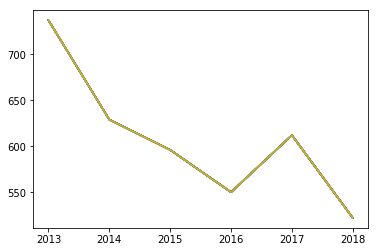

In [44]:
plt.plot(axes, counts)

Amount of revenue budgeted went up over the 6 year period, but number of services receiving budgets went down

AttributeError: 'AxesSubplot' object has no attribute 'show'

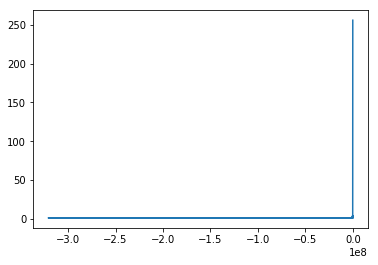

In [35]:
thirteen["Amount"].value_counts().plot().show()

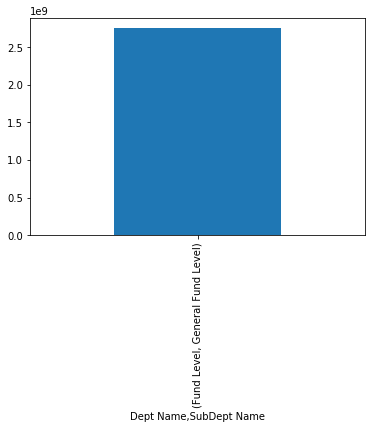

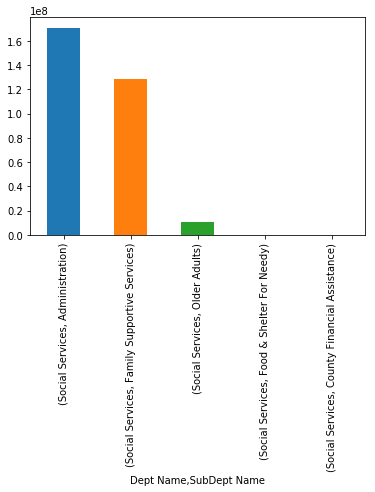

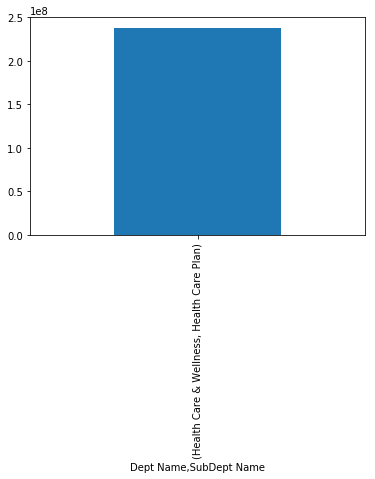

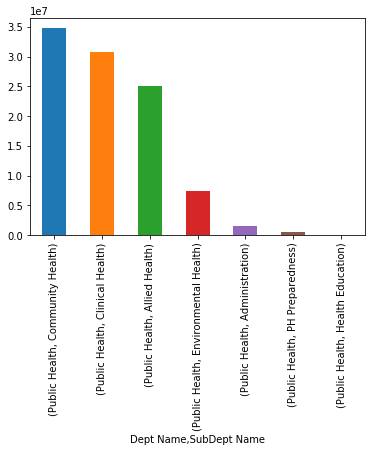

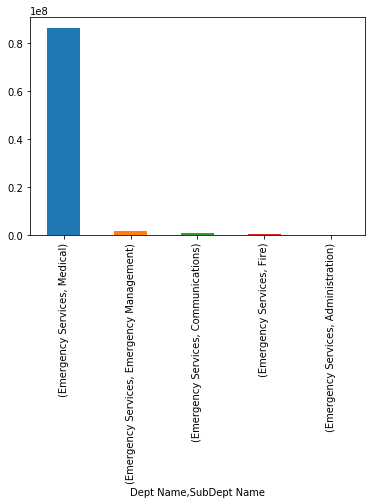

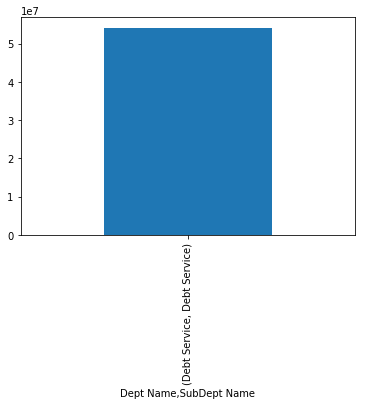

[None, None, None, None, None, None]

In [47]:
d=data.groupby(by=["Dept Name"])["Amount"].sum().sort_values(ascending=False)[0:10]
[plt.show(data[data["Dept Name"]==d.index[i]].groupby(by=["Dept Name","SubDept Name"])["Amount"].sum().sort_values(ascending=False)[0:10].plot(kind="bar")) for i in range(0,6)]




In [48]:
deptmeans = data.groupby(by=["Dept Name"]).mean()
deptmeans

,Service #,Fund #,Dept #,SubDept#,Acct #,Amount,Year,PerCapita
Dept Name,,,,,,,,
Animal Services,370154.210526,100.0,370.000000,14.210526,47156.877193,8.614230e+04,2015.578947,-0.167174
Budget and Management,120110.000000,100.0,120.000000,10.000000,49507.000000,5.000000e+03,2018.000000,-0.009523
Child Support Enforcement,240110.000000,100.0,240.000000,10.000000,45585.200000,1.232202e+06,2015.500000,-2.396733
Clerk to the Board,102110.000000,100.0,102.000000,10.000000,49990.000000,0.000000e+00,2017.000000,0.000000
Cooperative Extension Service,290120.142857,100.0,290.000000,11.571429,48274.928571,4.185429e+03,2016.857143,-0.007982
Coordinated Services,295387.440000,100.0,295.000000,37.840000,45232.120000,1.338962e+05,2015.180000,-0.260307
County Administration,105180.285714,100.0,105.000000,17.428571,45392.714286,3.497800e+04,2015.857143,-0.068263
County Attorney,110110.000000,100.0,110.000000,10.000000,45146.000000,2.500000e+03,2017.500000,-0.004762
Court Alternatives,340110.000000,100.0,340.000000,10.000000,47027.041667,5.389139e+05,2015.458333,-1.045206


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


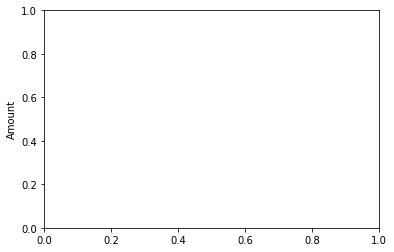

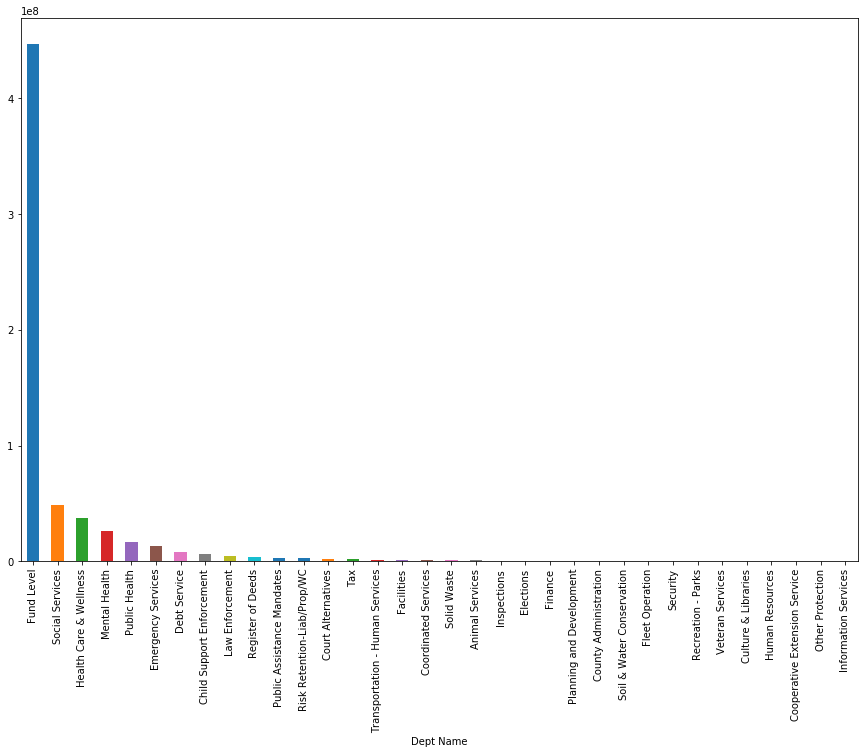

In [53]:
plt.ylabel("Amount")
plt.figure(figsize=(15,10))
#plt.figsize(30,60)
thirteen["Amount"] = thirteen["Amount"] * -1
plt.show(thirteen.groupby("Dept Name")["Amount"].sum().sort_values(ascending=False).plot(kind='bar'))
# plt.show()